# Lesson 3.9: Measures of accuracy & Data Imbalance

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to dive deeper into the concepts of logistic regression including accuracy measures of the model and model assumptions. We will also introduce data imbalance in logistic regression problems and the methods to resolve the problem.

---

### Setup

- All previous set up
- Use the Jupyter notebook from the last lesson

### Learning Objectives

After this lesson, students will be able to:

- Measure of accuracy for classification problems
- Recognize the assumptions of logistic regression model
- Test the assumptions of the model
- Identify data imbalance and how to resolve the issue

---

### Lesson 1 key concepts (word doc added)


> :clock10: 20 min

Checking model accuracy

- Confusion matrix
- Precision, Recall
- `ROC AUC` curve

:exclamation: Note `ROC AUC` curves are defined for binary classification problems. 

Code Sample: Confusion Matrix

We get first the logistic regression model of unit 2.09 (data already cleaned)

In [10]:
import pickle

In [11]:
with open("./files_for_lesson_and_activities/X.pickle", 'rb') as fp:
    X = pickle.load(fp)
with open("./files_for_lesson_and_activities/y.pickle", 'rb') as fp:
    y = pickle.load(fp)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [13]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr', max_iter=500).fit(X_train, y_train)

In [14]:
predictions = classification.predict(X_test)

**Confusion matrix**

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[24721,    77],
       [ 3437,   231]], dtype=int64)

**Use this [document](files_for_lesson_and_activities/accuracy_measures_classification_models.md)**

Code Sample: ROC AUC

In [40]:
classification.predict_proba(X_test)[0, : ]

array([0.89729448, 0.10270552])

In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[:, 1]



In [66]:
predictions2 = []
for i in range(len(y_pred_proba)): 
    if y_pred_proba[i] <= 0.7:
        predictions2.append('A')
    else:
        predictions2.append('B')
        

In [67]:
import numpy as np

np.all(predictions == predictions2)

False

In [68]:
confusion_matrix(y_test, predictions2)

array([[24797,     1],
       [ 3644,    24]], dtype=int64)

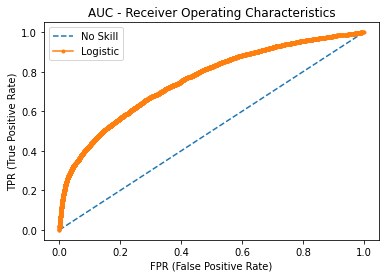

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba, pos_label='B')
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.title("AUC - Receiver Operating Characteristics")
plt.legend()

In [33]:
auc = metrics.auc(fpr, tpr)
print(f"AUC - Receiver Operating Characteristics: {auc:.2f}")

AUC - Receiver Operating Characteristics: 0.76


# 3.09 Activity 1

Why `ROC AUC` is a better alternative than accuracy for imbalanced datasets?

### Solution

`ROC` does not depend on the class distribution. This makes it useful for evaluating classifiers predicting rare events such as diseases or disasters. In contrast, evaluating performance using accuracy (TP + TN)/(TP + TN + FN + FP) would favor classifiers that always predict a negative outcome for rare events.

### Lesson 2 key concepts

> :clock10: 20 min

- Revisiting assumptions of linear regression
- Some assumptions in linear regression that are not required for logistic regression
- Assumptions of logistic regression model

:Exclamation: Note to instructor: Students and instructor can use this [additional resource](https://www.lexjansen.com/wuss/2018/130_Final_Paper_PDF.pdf).

<details>
  <summary> Difference in assumptions between linear regression and logistic regression</summary>

- Logistic regression does not need a linear relationship between the dependent and independent variables.
- The independent variables do not need to be multivariate normal – although multivariate normality yields a more stable solution.
- The error terms (the residuals) do not need to be multivariate normally distributed.
- Homoscedasticity is not needed. Logistic regression does not need variances to be heteroscedastic for each level of the independent variable.

More info: [][https://www.statisticssolutions.com/wp-content/uploads/wp-post-to-pdf-enhanced-cache/1/assumptions-of-logistic-regression.pdf]


Assumptions of logistic regression

- Binary logistic regression requires the dependent variable to be binary.
- Since logistic regression assumes that `P(Y=1)` is the probability of the event occurring, it is necessary that the dependent variable is coded accordingly. That is, for a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
- The error terms need to be independent.
- The model should have little or no multicollinearity. That is that the independent variables should be independent from each other.
- Logistic regression assumes linearity of independent variables and log odd.
- It requires quite large sample sizes. Some statisticians recommend at least 30 cases for each parameter to be estimated.

# 3.09 Activity 2

Think of some real examples where a logistic regression model can be of a help. Discuss about the variables we would need for the prediction and the assumptions above.

- If a client will renew a subscription
- If a visitor to our online shop will buy or not
- If a person will attend a clinical appointment
- If an student will fail an exam
- ...

### Lesson 3 key concepts

> :clock10: 20 min

Testing the assumptions of the logistic regression

- Multicollinearity (already discussed with Linear Regression)
- Linear relationship between independent variables and log odds

# 3.09 Activity 3

Test the assumptions of the logistic regression in the example of `files_for_lab/customer_churn.csv` file.

- Multicollinearity?
- [Optional] Linear relationship between independent variables and log odds?

### Lesson 4 key concepts

> :clock10: 20 min

- Introduce data imbalance
- Methods to resolve data imbalance

      - Upsampling methods
      - Downsampling methods

# 3.09 Activity 4

Given the following simulated data, check visually the effects of basic `RandomUnderSampler` and `RandomOverSampler` methods from the `imblearn` library on the data. Do you think it is a good result? How could it be improved?

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

np.random.seed(42) # setting the seed for reproducibility.

x1 = list(np.random.normal(0.1, 0.1, 100))
x2 = list(np.random.normal(-0.1, 0.1, 100))
y = ['Yes']*100
df1 = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y})

x1 = list(np.random.normal(-0.1, 0.1, 1000))
x2 = list(np.random.normal(0.1, 0.1, 1000))
y = ['No']*1000

df2 = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y}) 

data = pd.concat([df1,df2], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

data.head()
```

# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. **Tomek links** are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?